<a href="https://colab.research.google.com/github/pravallika-1305/WISE_ML/blob/main/DecisionTree_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('/content/drive/My Drive/Data/Diabetes.csv', names = ['preg','plas','pres','skin','test','mass','pedi','age','class'])

In [7]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


preg        AxesSubplot(0.125,0.657941;0.227941x0.222059)
plas     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
pres     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
skin        AxesSubplot(0.125,0.391471;0.227941x0.222059)
test     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
mass     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
pedi           AxesSubplot(0.125,0.125;0.227941x0.222059)
age         AxesSubplot(0.398529,0.125;0.227941x0.222059)
class       AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

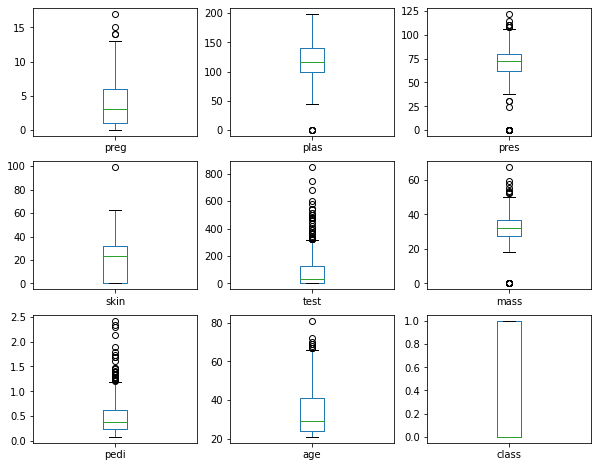

In [31]:
#outliers are present
#since decision trees are robust to outliers, ignoring this aspect for now.
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

In [29]:
features = df.drop(['class'], axis=1)
features.head(40)

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [10]:
target = df['class']
target.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [14]:
X_train.info()
len(y_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 334 to 102
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    537 non-null    int64  
 1   plas    537 non-null    int64  
 2   pres    537 non-null    int64  
 3   skin    537 non-null    int64  
 4   test    537 non-null    int64  
 5   mass    537 non-null    float64
 6   pedi    537 non-null    float64
 7   age     537 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 37.8 KB


537

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [16]:
def train_using_gini(X_train, y_train): 

    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)
    clf_gini.fit(X_train, y_train) 
    return clf_gini

In [17]:
def train_using_entropy(X_train, y_train):

    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy

In [18]:
def prediction(X_test, clf_object): 
    y_pred = clf_object.predict(X_test) 
    return y_pred


In [19]:
clf_gini = train_using_gini(X_train, y_train) 
clf_entropy = train_using_entropy(X_train, y_train)

In [20]:
y_pred_gini = prediction(X_train, clf_gini) 
print("Training Accuracy:" + str(accuracy_score(y_train, y_pred_gini)*100))

y_pred_gini_test = prediction(X_test, clf_gini) 
print("Testing Accuracy:" + str(accuracy_score(y_test, y_pred_gini_test)*100))

Training Accuracy:100.0
Testing Accuracy:69.6969696969697


In [22]:
y_pred_entropy = prediction(X_train, clf_entropy)
print("Training Accuracy:" + str(accuracy_score(y_train, y_pred_entropy)*100))

y_pred_entropy_test = prediction(X_test, clf_entropy) 
print("Testing Accuracy:" + str(accuracy_score(y_test, y_pred_entropy_test)*100))

Training Accuracy:100.0
Testing Accuracy:71.86147186147186


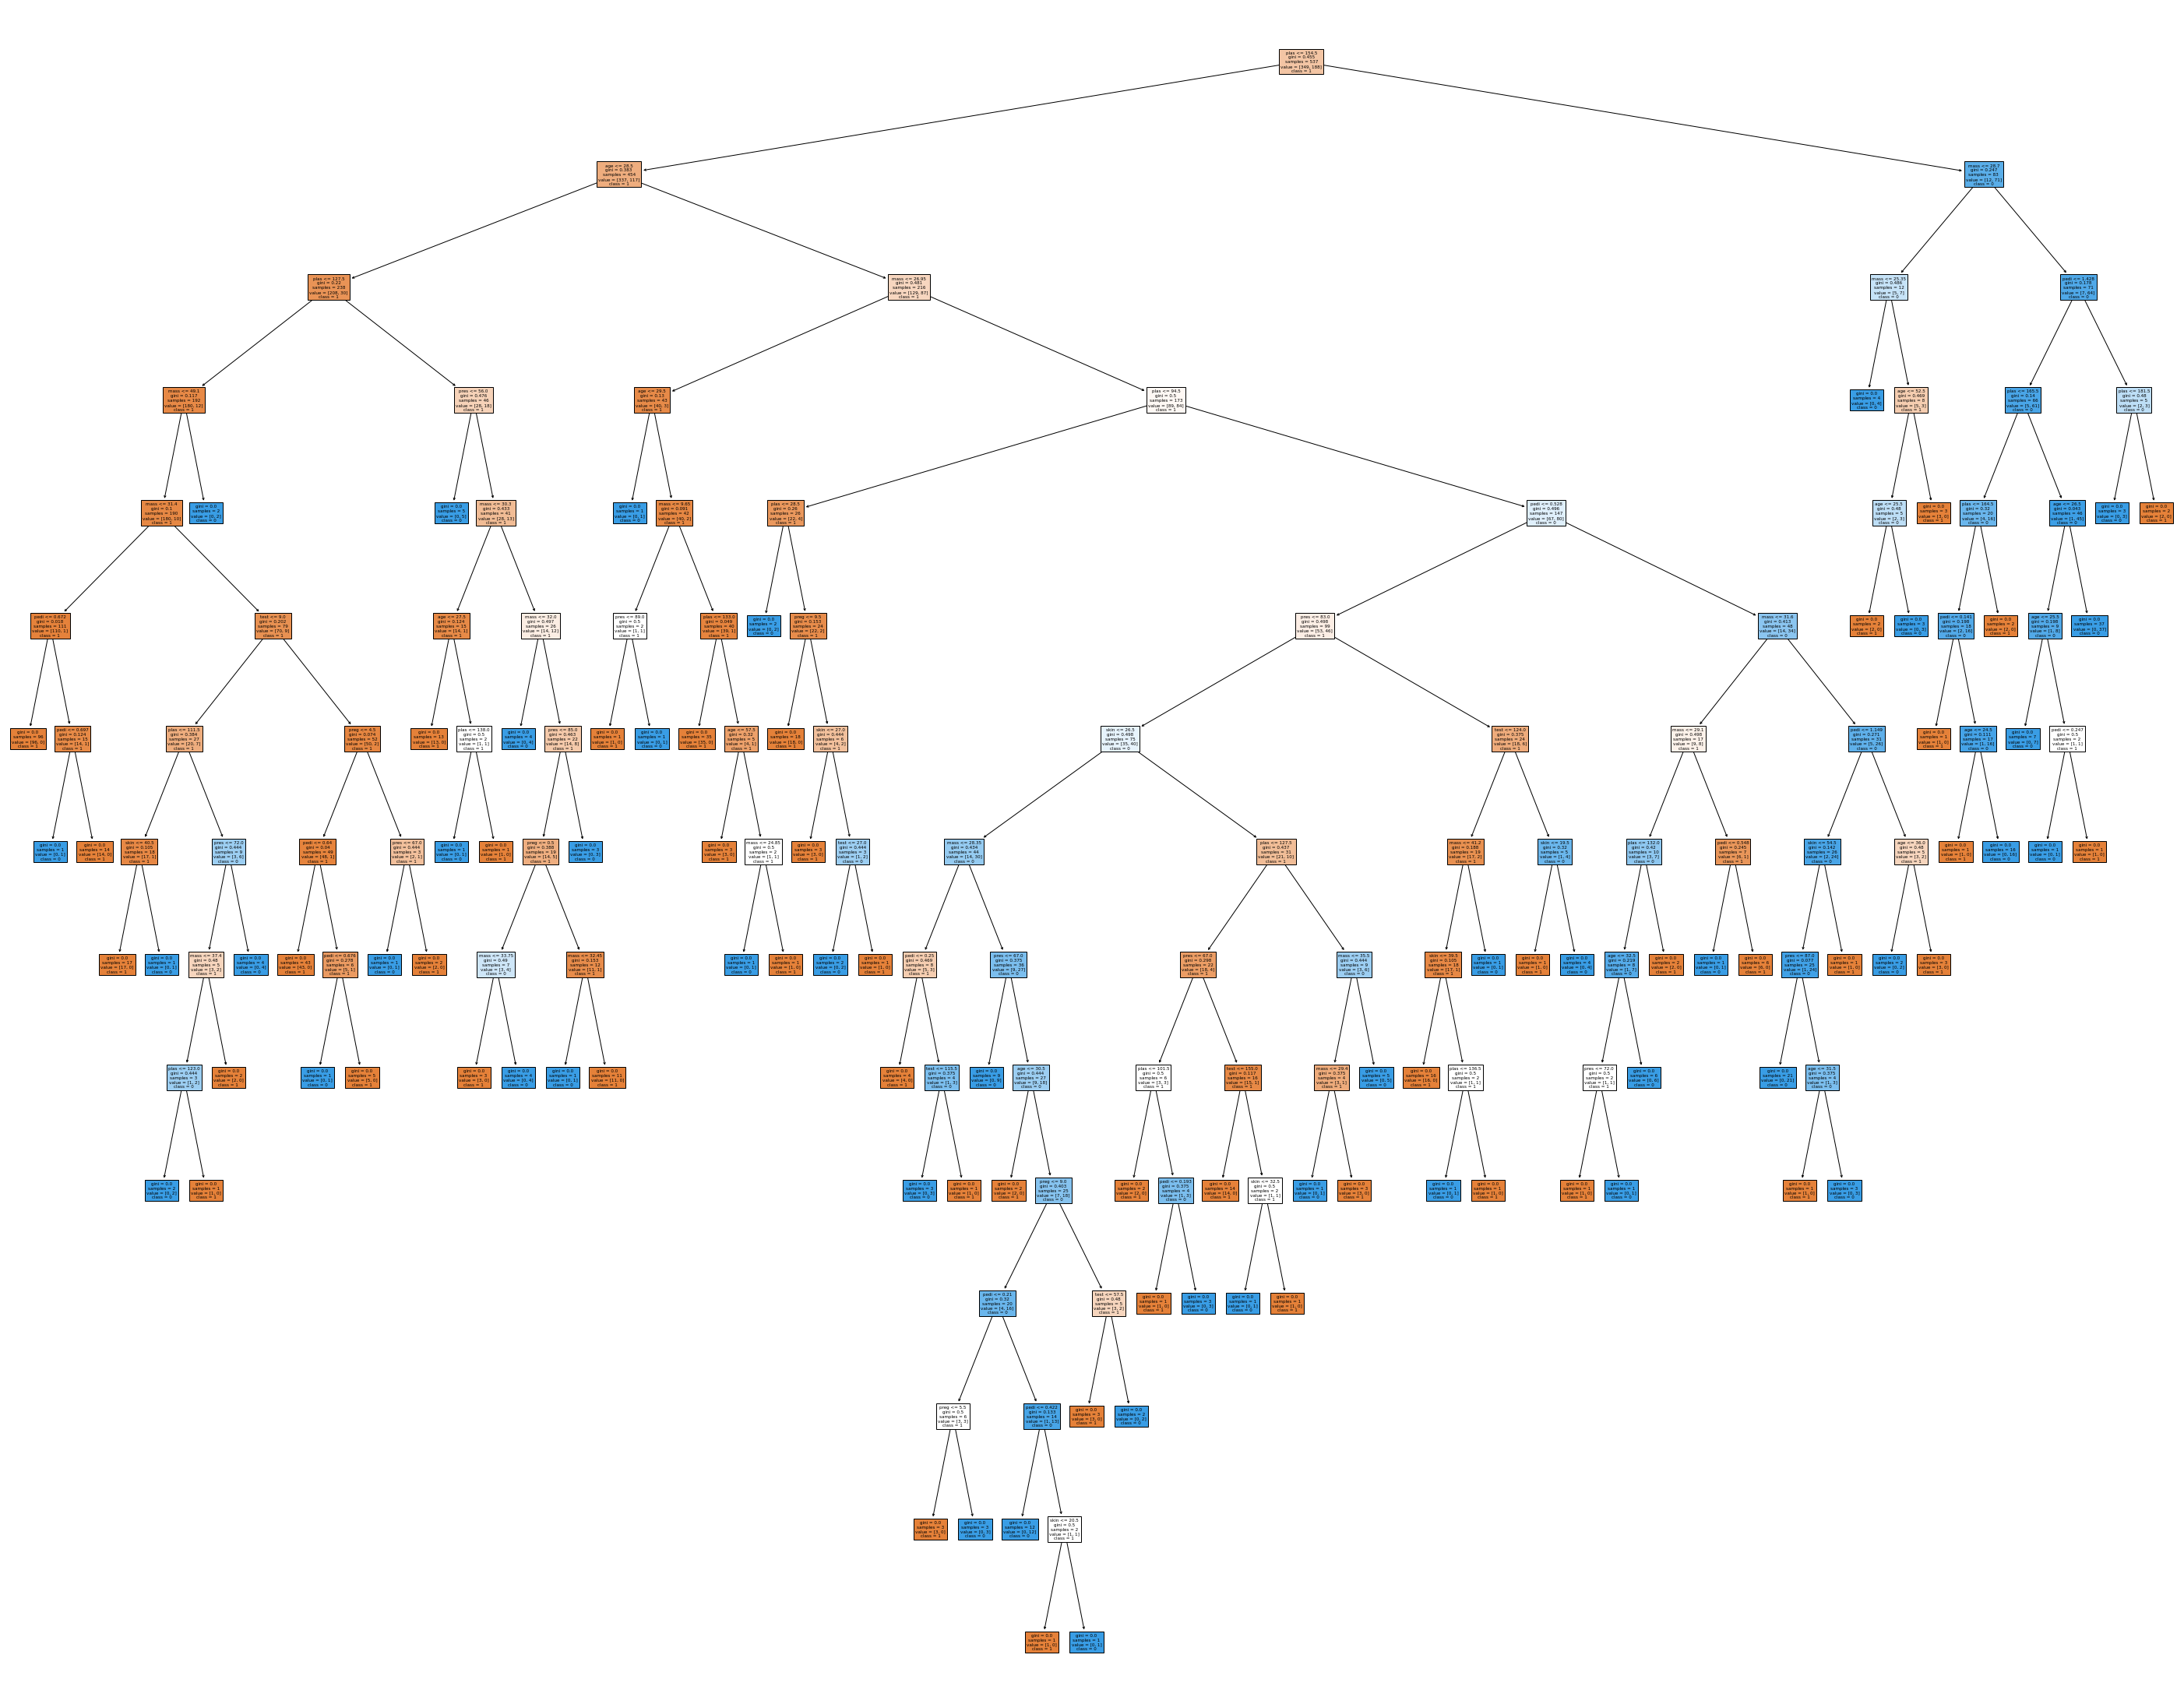

In [26]:

fig = plt.figure(figsize=(50, 40))
plot_tree(clf_gini, filled=True, feature_names=features.columns, class_names=[str(i) for i in df['class'].unique()])
plt.show()
#trees are very branched, so categorizing some variables into labels based on their ranges might help.

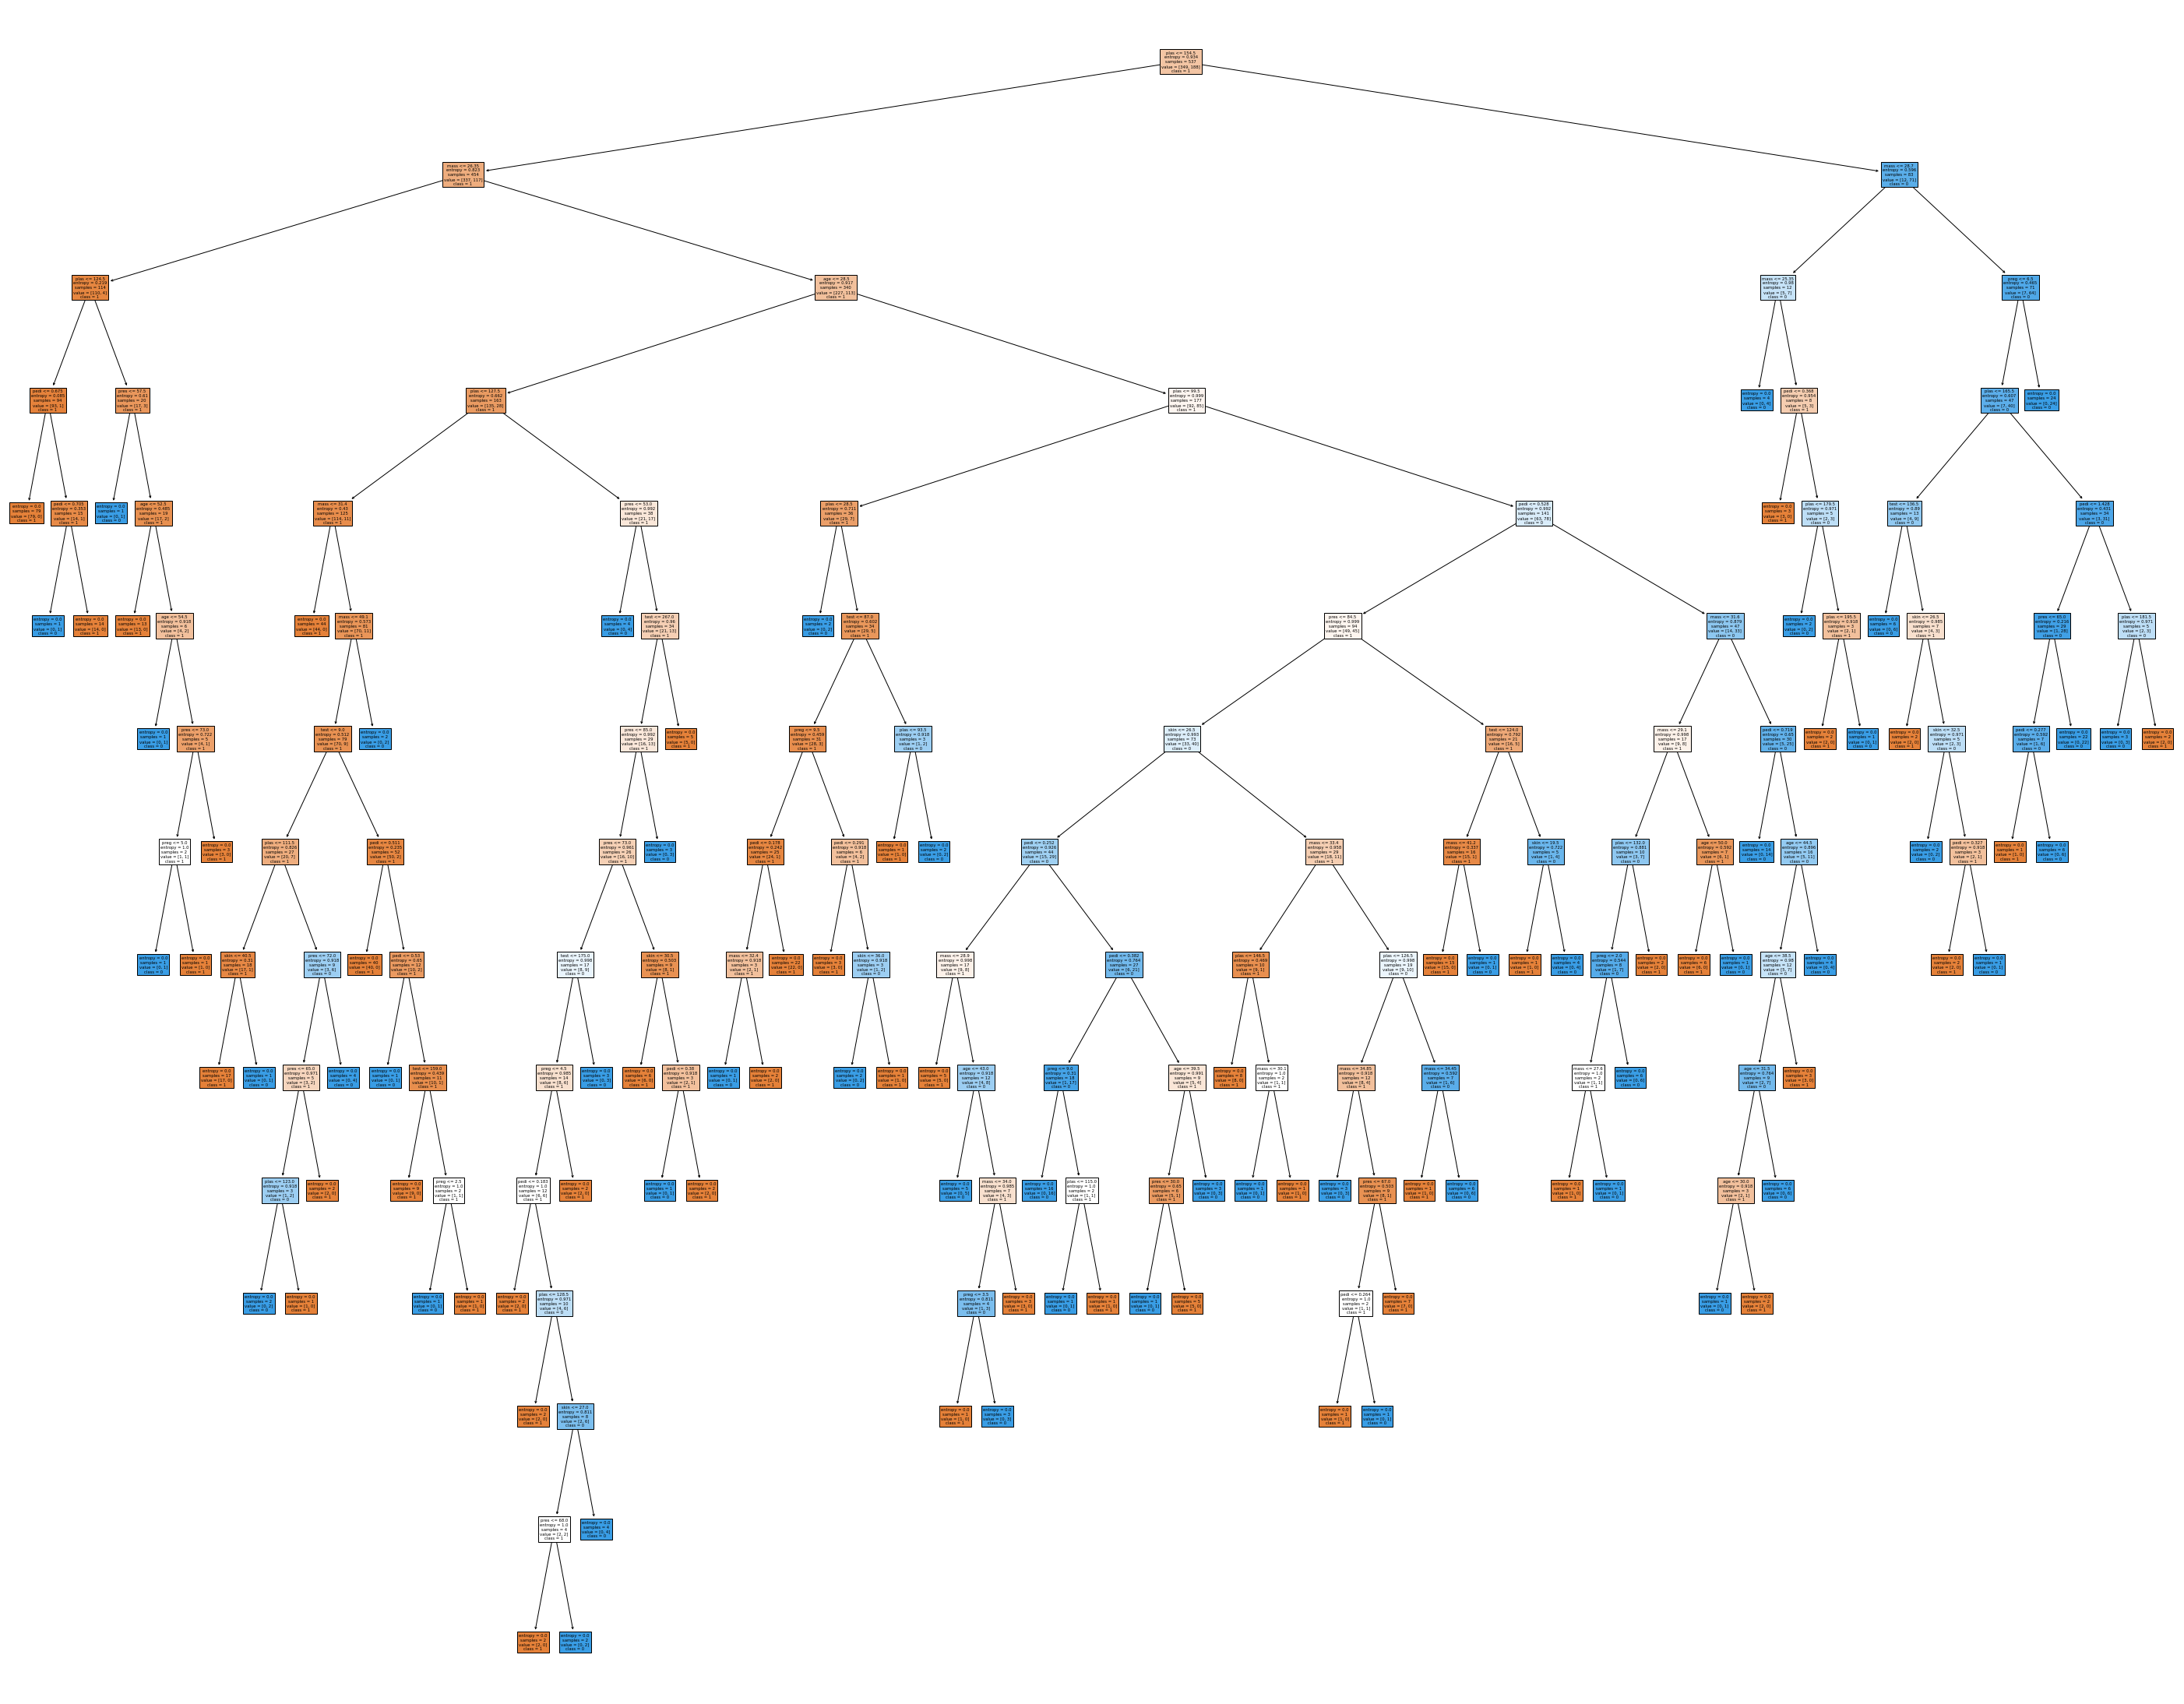

In [27]:

fig = plt.figure(figsize=(50, 40))
plot_tree(clf_entropy, filled=True, feature_names=features.columns, class_names=[str(i) for i in df['class'].unique()])
plt.show()